# Paper: Understanding the dynamic of ebola epidemics

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

0.0819672131147541
0.07042253521126761


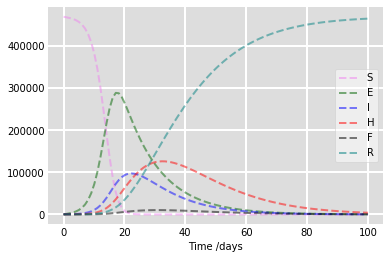

In [2]:
# Initial conditions
E0 = 0
I0 = 425
H0 = 0
F0 = 0
R0 = 0
N = 470000
S0 = N - I0

# A grid of time points (in days)
t = np.linspace(0, 100, 100) 

#parameters
beta1 = 3.532
beta_h = 0.012
beta_f = 0.462
alpha = 1/12
gamma_h = 1/4.2
theta1 = 0.65
gamma_i = 1/10
delta1 = 0.47
gamma_d = 1/8
delta2 = 0.42
gamma_f = 1/2
gamma_ih  = 1 / ( (1/gamma_d) + (1/gamma_h))
gamma_dh = 1 / ( (1/gamma_i) + (1/gamma_h))
print(gamma_ih)
print(gamma_dh)
# The SIR model differential equations.
def deriv(y, t, N, beta1, beta_h, beta_f, alpha, gamma_h, theta1, gamma_i, delta1, gamma_d, delta2, gamma_f, gamma_ih , gamma_dh):
    S, E, I, H, F, R  = y
    dSdt = -1/N * (beta1 * S * I + beta_h * S * H + beta_f * S * F)
    dEdt = 1/N * (beta1 * S * I + beta_h * S * H + beta_f * S * F) - alpha * E
    dIdt = alpha * E - (gamma_h * theta1 + gamma_i * (1-theta1)*(1-delta1) + gamma_d * (1-theta1) * delta1) * I
    dHdt = gamma_h * theta1 * I - (gamma_dh * delta2 + gamma_ih * (1-delta2)) * H
    dFdt = gamma_d * (1-theta1) * delta1 * I + gamma_dh * delta2 * H - gamma_f * F
    dRdt = gamma_i * (1-theta1) * (1-delta1) * I + gamma_ih * (1-delta2) * H + gamma_f * F

    return dSdt, dEdt, dIdt, dHdt, dFdt, dRdt


# Initial conditions vector
y0 = S0, E0, I0, H0, F0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta1, beta_h, beta_f, alpha, gamma_h, theta1, gamma_i, delta1, gamma_d, delta2, gamma_f, gamma_ih , gamma_dh))
S, E, I, H, F, R = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='S', linestyle='dashed')
ax.plot(t, E, 'darkgreen', alpha=0.5, lw=2, label='E', linestyle='dashed')
ax.plot(t, I, 'blue', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, H, 'red', alpha=0.5, lw=2, label='H', linestyle='dashed')
ax.plot(t, F, 'black', alpha=0.5, lw=2, label='F', linestyle='dashed')
ax.plot(t, R, 'teal', alpha=0.5, lw=2, label='R', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S, E, I, H, F, R]) 

#np.savetxt("ebola.csv", a, delimiter=",")